In [1]:
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.insert(1, '../python_scripts/')
from wavenumbers import *
from plot import plot_wavenumber_cloud, plot_acquisition_layout

# Contributions of some specific layouts

In this notebook we will study the wavenumber clouds produced by specific layouts. 

#### Which layout corresponds to which part of the cloud?

Specificly we see how the sides taken by the sources and receivers will affect the wavenumber cloud. We will consider four different layouts where each half of the acquisition range is occupied by either sources and/or receivers. We will denote them by the following codes:

1. **lr**: The sources on the left half of the range and the receivers on the right.
2. **rl**: The sources on the right and the receivers on the left.
3. **ll**: Both sources and receivers are on the left half of the acquisition range.
4. **rr**: Both sources and receivers are on the right half of the acquisition range.

In [2]:
# Data in common to each layout
x_diffraction_pt = np.array([5000, -3000]) # difraction point, fixed throughout the notebook
N = 31 # number of sources and receivers
c0 = 2*np.pi # velocity of the medium
f0 = 1 # # time frequency

# Endpoints of the acquisition range
start = 0
midpoint = 5000
end = 10000

# Options to pass to the plot_wavenumeber_cloud function
colors = ["k", "g", "b", "r"]
markers = ["D", "*", "+", "x"]
labels = ['left to right', 'right to left', 'all left', 'all right']
K_list = []

## 1 - The layouts separately

## 1.1 - lr: Sources on the left, receivers on the right.

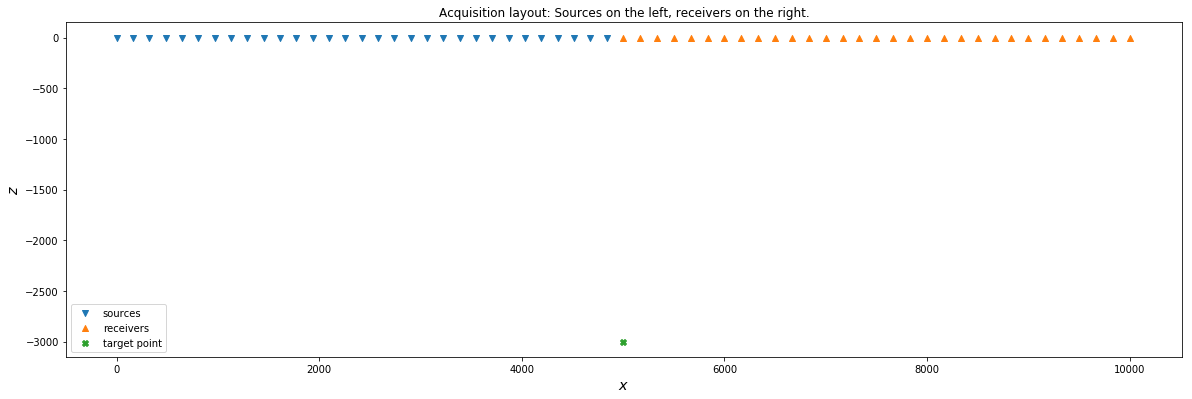

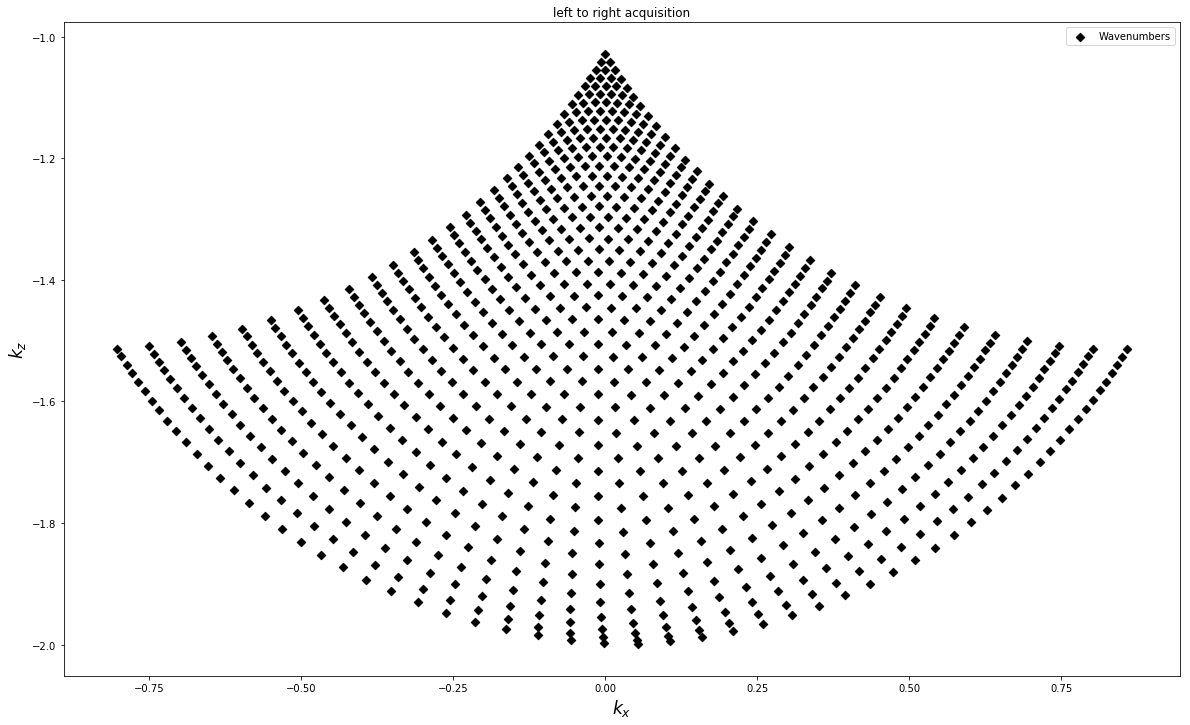

In [3]:
# lr: Sources on the left, receivers on the right.
# sources and receivers
S = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the sources
R = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers

plot_acquisition_layout(S, R, x_diffraction_pt, title = "Acquisition layout: Sources on the left, receivers on the right.")
Klr = wavenumbers_positions_formula(x_diffraction_pt, S, R, c0, f0)

K_list.append(Klr)
plot_wavenumber_cloud([Klr], colors = [colors[0]], markers = [markers[0]], labels = ["Wavenumbers"], title = labels[0] + " acquisition")

## 1.2 - rl: Sources on the right, receivers on the left.

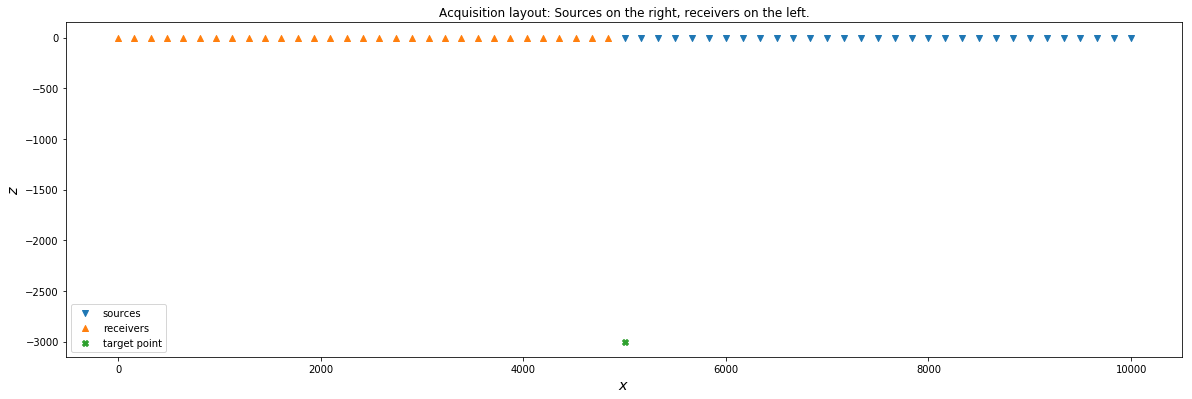

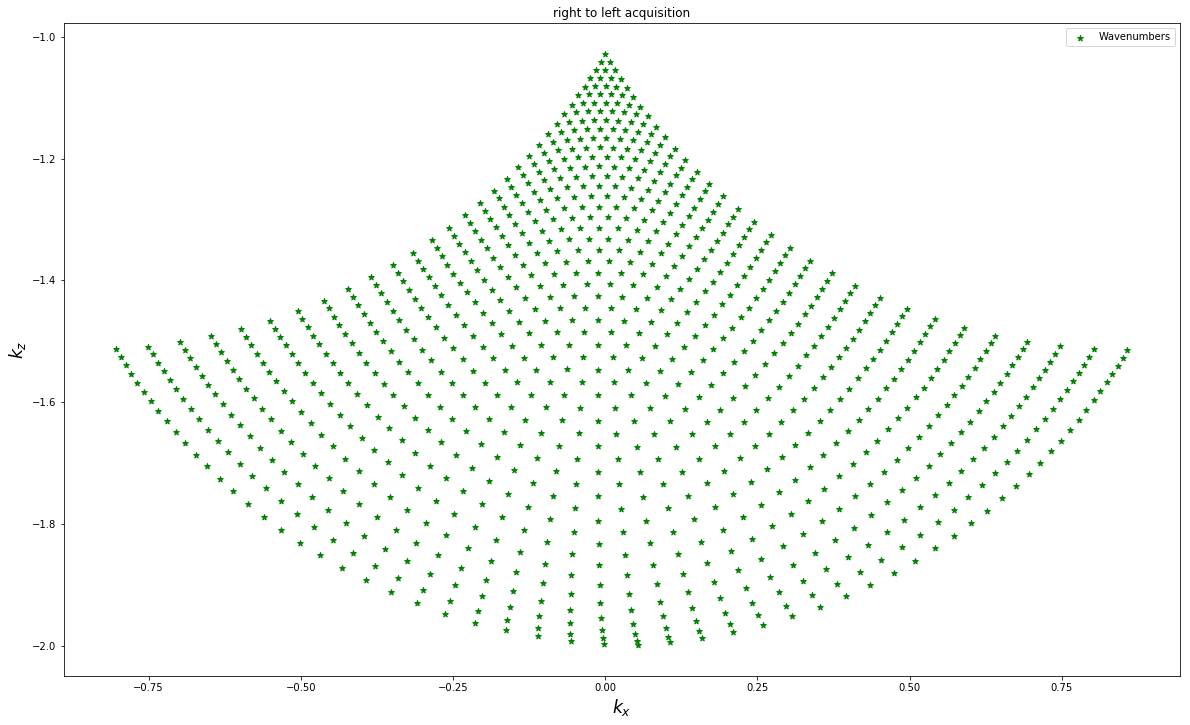

In [4]:
# rl: Sources on the right, receivers on the left.
# sources and receivers
S = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the receivers

plot_acquisition_layout(S, R, x_diffraction_pt, title = "Acquisition layout: Sources on the right, receivers on the left.")
Krl = wavenumbers_positions_formula(x_diffraction_pt, S, R, c0, f0)

K_list.append(Krl)
plot_wavenumber_cloud([Krl], colors = [colors[1]], markers = [markers[1]], labels = ["Wavenumbers"], title = labels[1] + " acquisition")

## 1.3 - ll: Sources and receivers both on the left side.

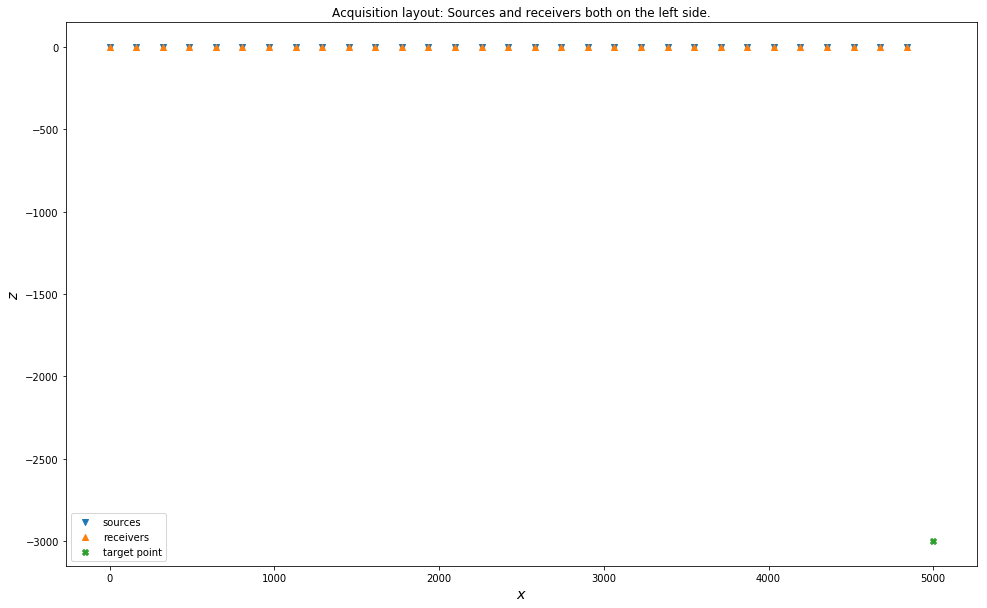

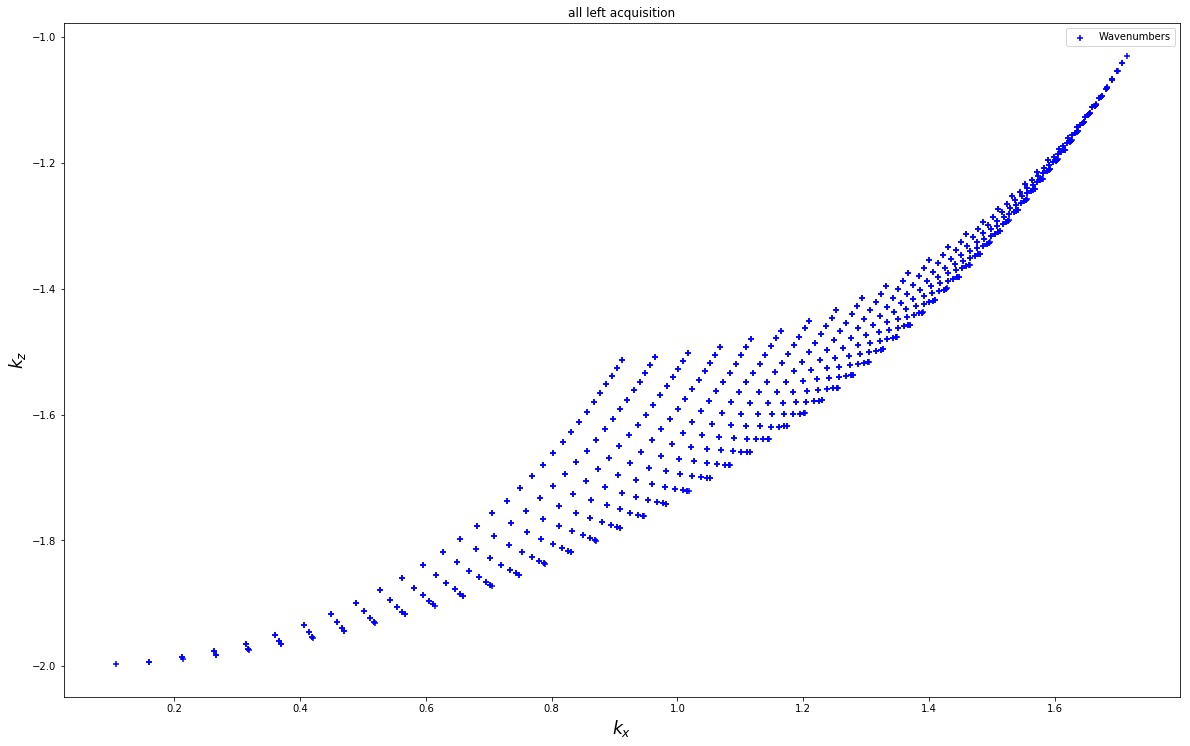

In [5]:
# ll: Sources and receivers both on the left side.
# sources and receivers
S = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the sources
R = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the receivers

plot_acquisition_layout(S, R, x_diffraction_pt, title = "Acquisition layout: Sources and receivers both on the left side.")
Kll = wavenumbers_positions_formula(x_diffraction_pt, S, R, c0, f0)

K_list.append(Kll)
plot_wavenumber_cloud([Kll], colors = [colors[2]], markers = [markers[2]], labels = ["Wavenumbers"], title = labels[2] + " acquisition")

## 1.4 - rr: Sources and receivers both on the right side.

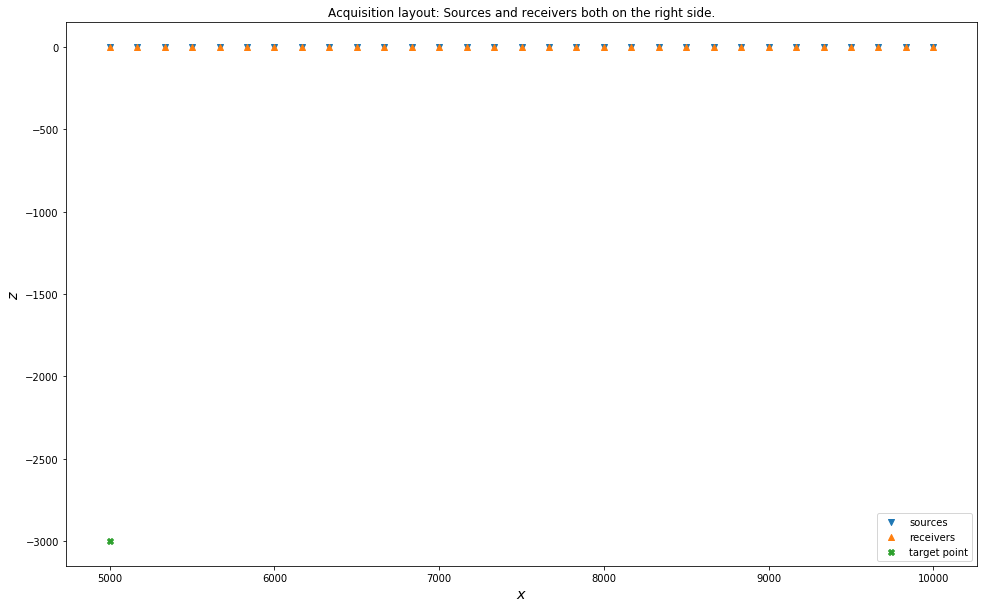

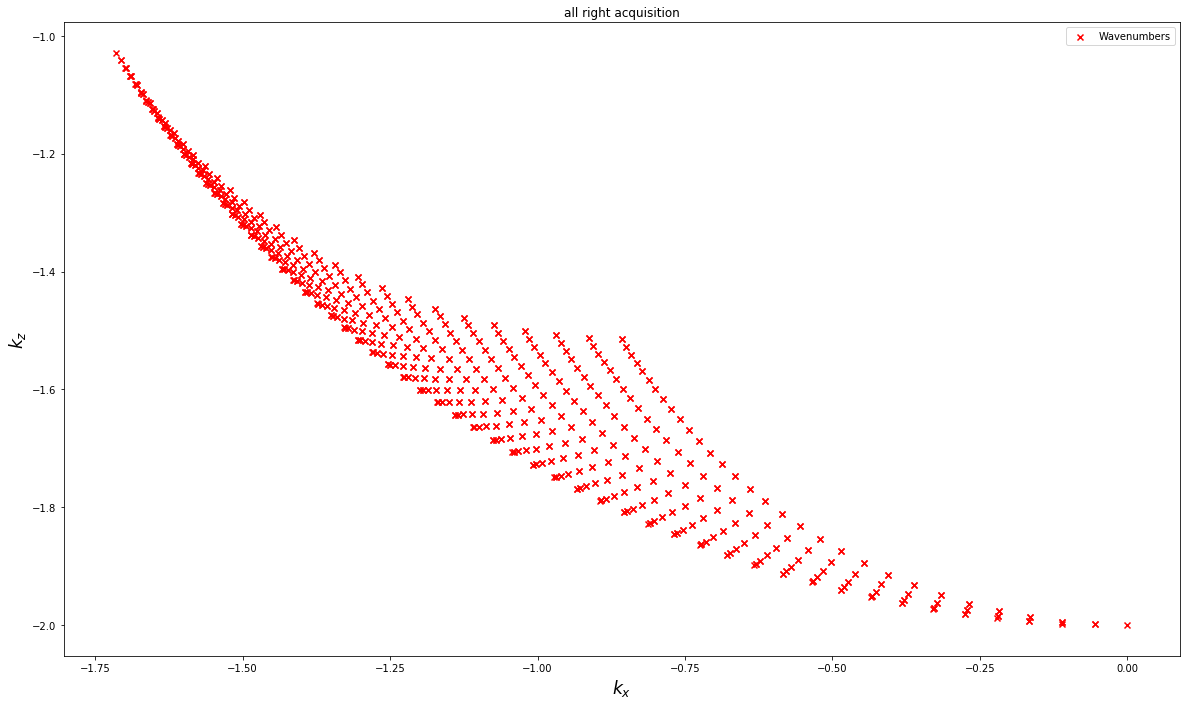

In [6]:
# rr: Sources and receivers both on the right side.
# sources and receivers
S = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers

plot_acquisition_layout(S, R, x_diffraction_pt, title = "Acquisition layout: Sources and receivers both on the right side.")
Krr = wavenumbers_positions_formula(x_diffraction_pt, S, R, c0, f0)

K_list.append(Krr)
plot_wavenumber_cloud([Krr], colors = [colors[3]], markers = [markers[3]], labels = ["Wavenumbers"], title = labels[3] + " acquisition")

## 2 - The contributions of the layout

In this figure we can see to which part of the wavenumbers cloud do the distinct layouts contribute to. We notice that the parts are distinct.

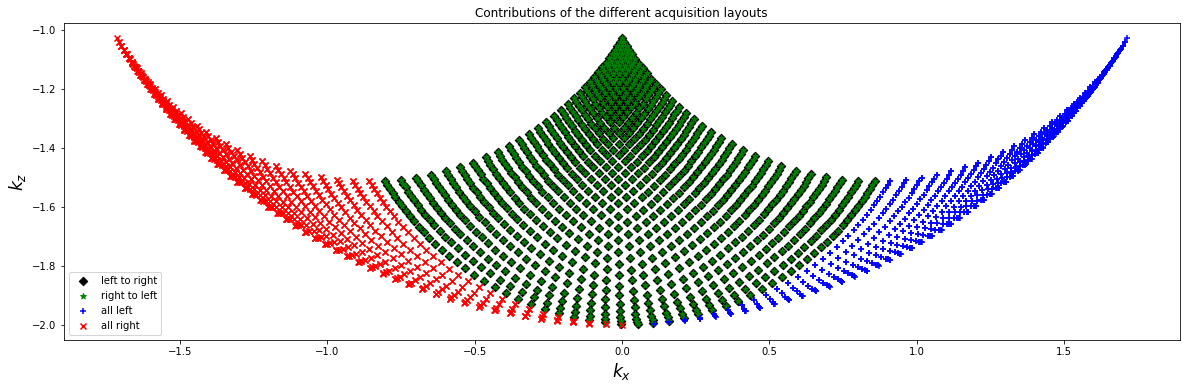

In [7]:
if(len(K_list) != 4):
    print("Restart the notebook, the list of wavenumbers clouds doesn't contain 4 elements.")
else:
    plot_wavenumber_cloud(K_list, colors = colors, markers = markers, labels = labels, title = "Contributions of the different acquisition layouts")